In [1]:
#############################
### Generating data
# Simulate a 3rd-order polynomial data
# y = beta0 + beta1 * x + beta2 * x**2 + beta3 * x**3 + epsilon
# epsilon ~ N(0, sigma^2)
#############################

In [2]:
## population parameters
beta0 = 1
beta1 = -2
beta2 = 6
beta3 = -1
sigma = 2

In [3]:
import numpy as np

In [4]:
## training data
x = np.arange(0, 4.96, 0.05)
print(x.size)
print(x.shape)

100
(100,)


In [5]:
f_x = beta0 + beta1 * x + beta2 * x**2 + beta3 * x**3

In [6]:
# Add noise to targets
# sigma * np.random.randn(...) + mu or np.random.normal(mu, sigma, 1000)
np.random.seed(10)
epsilon = np.random.normal(0, 2, 100)
y = f_x + epsilon
print(y.size)
print(y.shape)

100
(100,)


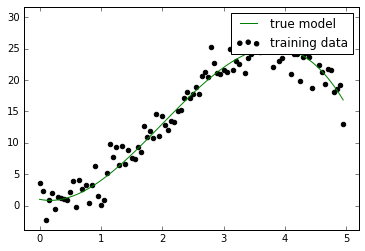

In [7]:
# visualize the training data (x, y) and the true model f_x
import matplotlib.pyplot as plt
#show the plot in current web page
%matplotlib inline 
plt.scatter(x, y, c='k', label='training data')
plt.plot(x, f_x, c='g', label='true model')
plt.axis('tight')
plt.legend()
#plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors,
 #                                                               weights))

plt.show()

In [8]:
## test data
x_test = np.arange(0, 5.01, 0.1)
f_x_test = beta0 + beta1 * x_test + beta2 * x_test**2 + beta3 * x_test**3
np.random.seed(10)
epsilon_test = np.random.normal(0, sigma, x_test.size)
y_test = f_x_test + epsilon_test
x_test.shape

(51,)

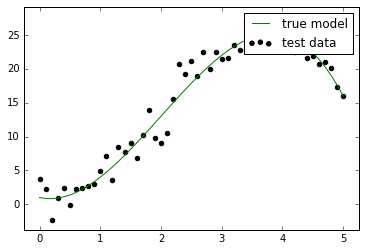

In [9]:
# visualize the test data (x, y) and the true model f_x
plt.scatter(x_test, y_test, c='k', label='test data')
plt.plot(x_test, f_x_test, c='g', label='true model')
plt.axis('tight')
plt.legend()
#plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors,
 #                                                               weights))

plt.show()

In [10]:
#############################
### KNN regression
#############################

In [11]:
# knn regression is in package "sklearn" 
from sklearn import neighbors
?neighbors.KNeighborsRegressor

In [12]:
# prepare the X data in the matrix format, as required by scikit
x = x.reshape(100,1)
y = y.reshape(100,1)
x_test = x_test.reshape(51,1)
y_test = y_test.reshape(51,1)

In [13]:
## 1. k=15, training MSE
knn15 = neighbors.KNeighborsRegressor(15, weights='uniform')
knn15train = knn15.fit(x, y).predict(x)

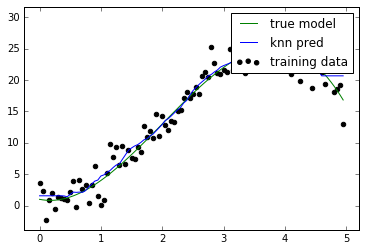

In [14]:
# plot the fit
plt.scatter(x, y, c='k', label='training data')
plt.plot(x, f_x, c='g', label='true model')
plt.plot(x, knn15train, c='b', label='knn pred')
plt.axis('tight')
plt.legend()
#plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors,
 #                                                               weights))

plt.show()

In [15]:
# Training MSE
np.mean((y - knn15train)**2)

4.1457687777301837

In [16]:
## 1b. k=15, test MSE
knn15test = knn15.fit(x, y).predict(x_test)

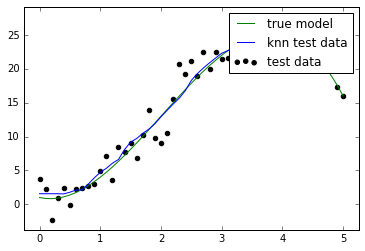

In [17]:
# plot the fit
plt.scatter(x_test, y_test, c='k', label='test data')
plt.plot(x_test, f_x_test, c='g', label='true model')
plt.plot(x_test, knn15test, c='b', label='knn test data')
plt.axis('tight')
plt.legend()
#plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors,
 #                                                               weights))

plt.show()

In [18]:
# Test MSE
np.mean((y_test - knn15test)**2)

3.728569200464352

In [19]:
## 2. Training and Test Error plot: to enumerate many many k values and measure MSE
# k's that will be evaluated
ks = np.arange(1, 30.1, 1, dtype=np.int_)
# construct empty vectors for keeping the MSE for each k
mse_train = np.zeros(ks.size,)
mse_test = np.zeros(ks.size,)

In [20]:
# loop over all the k and evaluate MSE in each of them
for i in ks:
    knnen = neighbors.KNeighborsRegressor(ks[i-1], weights='uniform')
    model_train = knnen.fit(x, y).predict(x)
    model_test = knnen.fit(x, y).predict(x_test)
    mse_train[i-1] = np.mean((y - model_train)**2)
    mse_test[i-1] = np.mean((y_test - model_test)**2)

In [21]:
print(mse_train)
print(mse_test)

[ 0.          1.50512232  2.68362151  2.83316916  3.20898679  3.27738131
  3.53366953  3.45380368  3.66562691  3.86400619  3.96953852  4.05703648
  4.09803367  4.03693291  4.14576878  4.21637922  4.42894637  4.32644125
  4.58163814  4.70085531  4.776152    4.80701368  4.91128354  5.05281428
  5.2967779   5.39083281  5.65263615  5.79507561  5.99692187  6.10608193]
[ 7.53474101  4.53358383  3.89914038  3.74163367  3.22867489  3.28707636
  3.27726864  3.41172327  3.36455895  3.60904696  3.40379111  3.49512688
  3.69627319  3.79769747  3.7285692   3.69027109  3.88012171  3.8724891
  4.20513889  4.35940149  4.39822204  4.3867645   4.60153622  4.69345191
  4.86634447  5.08677029  5.41724697  5.55852995  5.81469639  6.06564537]


In [22]:
# optimal k
k_opt = ks[np.argmin(mse_test)]
print(k_opt)
# optimal MSE
mse_opt = np.min(mse_test)
print(mse_opt)

5
3.22867489016


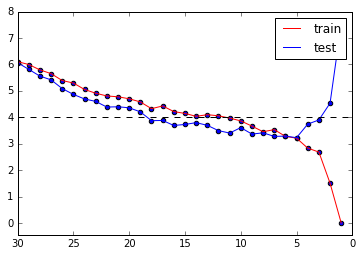

In [23]:
# plot MSE on Training and Test
plt.plot(ks, mse_train, c='r', label='train')
plt.scatter(ks, mse_train)
plt.plot(ks, mse_test, c='b', label='test')
plt.scatter(ks, mse_test)
plt.axis('tight')
plt.axhline(y=sigma**2, linestyle='dashed', color='k')
plt.legend()
#plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors,
 #                                                               weights))
plt.gca().set_xlim([0,30])
plt.gca().invert_xaxis()
plt.show()